In [94]:
import numpy as np
import pandas as pd # not really needed, only for preference
import matplotlib.pyplot as plt

In [95]:
def plot_perceptron(ax, data_X, data_y, w):
#     print(np.where(y==1)[0])
    X = pd.DataFrame(data_X)
    y = pd.DataFrame(data_y)
    pos_points = X.iloc[np.where(y==1)[0]]
    neg_points = X.iloc[np.where(y==-1)[0]]
    ax.scatter(pos_points[1], pos_points[2], color='blue')
    ax.scatter(neg_points[1], neg_points[2], color='red')
    xx = np.linspace(-6,6)
    yy = -w[0]/w[2] - w[1]/w[2] * xx
    ax.plot(xx, yy, color='orange')
    
    ratio = (w[2]/w[1] + w[1]/w[2])
    xpt = (-1*w[0] / w[2]) * 1/ratio
    ypt = (-1*w[0] / w[1]) * 1/ratio
    
    ax.arrow(xpt, ypt, w[1], w[2], head_width=0.2, color='orange')
    ax.axis('equal')

In [96]:
def find_mistake_values(alpha, X, y, inner_p):
    sums = []
    target_i = 0
    for i in range(81):
        one_sum = 0
        for j in range(81):
            one_sum += y[j] * alpha[j] * inner_p[i][j]
        sums.append(one_sum)
    yXw = (y * sums)
    mistake_idxs = np.where(yXw <= 0)[0]
    return mistake_idxs

def get_inner_produce(X):
    inner_p = []
    for i in range(81):
        one_inner_p = []
        for j in range(81):
            one_inner_p.append(np.matmul(X[j], X[i]))
        inner_p.append(one_inner_p)
    return inner_p

def train_perceptron(X_data, y, max_iter=100):
    eta=1
    np.random.seed(1)
    alpha = np.array([0 for i in range(81)])
    nmb_iter = 0
    inner_p = get_inner_produce(X_data)
    for _ in range(max_iter):               # termination condition (avoid running forever)
        X = X_data
        nmb_iter += 1           
        mistake_idxs = find_mistake_values(alpha, X, y, inner_p)
        if mistake_idxs.size > 0:
            i = np.random.choice(mistake_idxs)       
            alpha[i] += 1        
#             print(f"Iteration {nmb_iter}: alpha = {alpha}")

        else: # no mistake made
            print(f"Converged after {nmb_iter} iterations")
            return alpha, nmb_iter
    print("Cannot converge")
    return alpha,nmb_iter

In [97]:
data_x = pd.read_csv('Q3X.csv')
data_y = pd.read_csv('Q3y.csv')
print(data_y.shape)
print(data_x.shape)
data_x = data_x.values
data_y = data_y.values
alpha,nmb_iter = train_perceptron(data_x, data_y, 100)
n = 81

(81, 1)
(81, 3)
Converged after 33 iterations


[0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 3 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 2 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 9 0 0 0 0
 0 0 0 0 0 5 1]


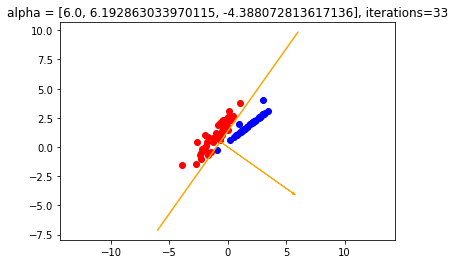

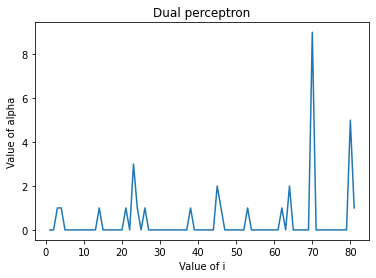

In [98]:
print(alpha)
w = [0,0,0]
for i in range(len(alpha)):
    w[0] += (alpha[i] * data_y[i] * data_x[i])[0]
    w[1] += (alpha[i] * data_y[i] * data_x[i])[1]
    w[2] += (alpha[i] * data_y[i] * data_x[i])[2]

fig, ax = plt.subplots()
plot_perceptron(ax, data_x, data_y, w) # from neural learning lab
ax.set_title(f"alpha = {w}, iterations={nmb_iter}")
plt.savefig("name.png", dpi=300) # if you want to save your plot as a png
plt.show()

plt.plot(range(1,n+1),alpha)
plt.ylabel("Value of alpha")
plt.xlabel("Value of i")
plt.title("Dual perceptron")
plt.show()